<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2023/blob/main/notebooks/es2/MetodiAI_Fis2023_Es2_python2_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercitazione 2: python e uso librerie numpy, matplotlib, pandas

**Task:**

implementare senza fare uso di librerie dedicate di Machine Learning un semplice algoritmo di classificazione basato sulla stima delle densità di probabilità delle feature discriminanti (*Classificatore Naive di Bayes*)

**Parte 1:**

Generazione di un dataset "toy": 

1. generare due campioni di esempi (uno per la classe segnale ($S$) e uno per la classe fondo ($B$)). Ogni esempio deve essere descritto da un vettore di dimensione $d=3$, in cui le tre feature, $(x_0,x_1,x_2)$, sono distribuite in accordo a distribuzioni gaussiane multivariate: $f(x_0,x_1,x_2) = GaussianaMultivariata(x_0,x_1,x_2:\mu, cov)$, con $\mu$ il vettore delle medie delle tre variabili e $cov$ la matrice $3\times 3$ di covarianza (ogni dimensione corrisponde ad una feature (osservabile) del dataset). <p>
`Suggerimento: usare la funzione numpy: np.random.multivariate_normal`

> le medie delle due distribuzioni per segnale e fondo da utilizzare sono: $\mu_S = [0.0, 4.0, -1.0]$, $\mu_B = [-2.5, 2.0, 2.0]$ 
> la matrice di covarianza tra le variabili è la stessa per le due classi $S$ e $B$ ed è data dalla matrice diagonale $diag[4.0, 1.0, 2.25]$
> la dimensione dei campioni è di $N=3000$ esempi per ognuna delle due classi.

2. graficare le distribuzioni delle feature delle due classi su tre proiezioni 2D: $(x_0,x_1), (x_0,x_2), (x_1,x_2)$ colorando con colori rosso e blu i punti appartenenti agli eventi di classe $S$ e $B$ rispettivamente <p>
`Suggerimento: usare la funzione matplotlib: plt.plot`


In [ ]:
#code

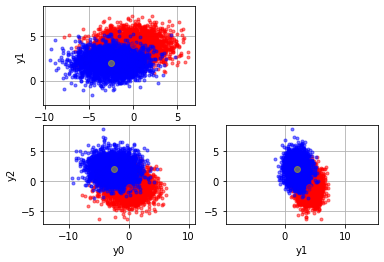

In [3]:
#@title Soluzione Parte 1 (clicca su show code per vedere il codice)
import numpy as np
import matplotlib.pyplot as plt

# genera 3 osservabili gaussiane, correlate (x1,x2,x3)

N = 3000

# valori medi delle tre osservabili
muS = np.array([0.0, 4.0, -1.0])
muB = np.array([-2.5, 2.0, 2.0])

# matrice di covarianza
rS = np.array([
        [ 4.0, 0.0, 0.0],
        [ 0.0, 1.0, 0.0],
        [ 0.0, 0.0, 2.25]
    ])

rB = rS

#nota: a=b tra due oggetti python non crea un nuovo oggetto, a e b puntano alla stessa locazione di memoria modificando uno si modifica anche l'altro
#      se si vuole creare una copia separata (in questo caso non è necessario) si deve fare una deep copy: b = a.copy()

# Generazione usando numpy
yS = np.random.multivariate_normal(muS, rS, size=N)
yB = np.random.multivariate_normal(muB, rB, size=N)


# Plot delle diverse proiezioni
plt.subplot(2,2,1)
plt.plot(yS[:,0], yS[:,1], 'r.', alpha=0.5)
plt.plot(yB[:,0], yB[:,1], 'b.', alpha=0.5)
plt.plot(muS[0], muS[1], 'ro', alpha=0.5)
plt.plot(muB[0], muB[1], 'yo', alpha=0.5)
plt.ylabel('y1')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(yS[:,0], yS[:,2], 'r.', alpha=0.5)
plt.plot(yB[:,0], yB[:,2], 'b.', alpha=0.5)
plt.plot(muS[0], muS[2], 'ro', alpha=0.5)
plt.plot(muB[0], muB[2], 'yo', alpha=0.5)
plt.xlabel('y0')
plt.ylabel('y2')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(yS[:,1], yS[:,2], 'r.', alpha=0.5)
plt.plot(yB[:,1], yB[:,2], 'b.', alpha=0.5)
plt.plot(muS[1], muS[2], 'ro', alpha=0.5)
plt.plot(muB[1], muB[2], 'yo', alpha=0.5)
plt.xlabel('y1')
plt.axis('equal')
plt.grid(True)

plt.show()

**Parte 2:**

Stima delle funzioni di distribuzione di probabilità delle singole osservabili per le due classi $S$ e $B$: $pdf(x_0|C), pdf(x_1|C),pdf(x_2|C)$ con $C=S,B$ 

1. costruire 3 histogrammi per ciascuna classe, con $M=20$ bin negli intervalli $(\mu-4\sigma, \mu+4\sigma)$ che contengano la distribuzione della densità di probabilità delle features $x_0,x_1,x_2$ nelle due classi. <p>
`Suggerimento: costruire un histogramma con plt.hist e riempirlo con ciascuna feature, usando l'opzione di avere histogrammi normalizzati`
> NOTA: usare solo i primi 2000 eventi di ogni campione per costruire gli istogrammi, lasciando 1000 come campione di test. 


2. scrivere una funzione python che prende in input un valore della feature $x$, uno degli istogrammi $H$, e ritorna la stima della probabilità associata $f(x_i) = pdf(x_i|S)$. <p>                      
>NOTA: la funzione *n, edges, patches = plt.hist(x,...)* di matplotlib ritorna tre array numpy: *n* contenenente il contenuto dei bin, *edges* contenente le edge (il valore della $x$ corrispondente all'estremo superiore) di ogni bin, ed il terzo non interessante per gli scopi.

3. plottare con matplotlib gli istogrammi così costruiti 

In [ ]:
#codice

pdf(x0=4.0|S) =  0.03312500000000004
pdf(x0=4.0|S) =  0.03312500000000004
pdf(x0=4.0|B) =  0.0006249999999999995
pdf(x0=4.0|B) =  0.0006249999999999995



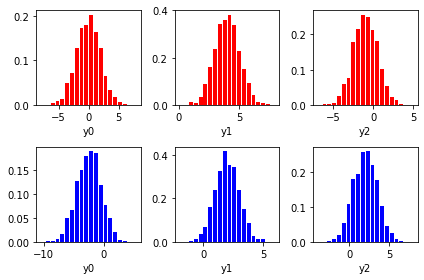

In [17]:
#@title Soluzione Parte 2 (clicca sul show code per vedere il codice)
import numpy as np
import matplotlib.pyplot as plt 

pdfS = []
edgesS = []
pdfB = []
edgesB = []
for i in range(3):
  plt.subplot(2,3,i+1)
  n, edges, _ = plt.hist(yS[:2000,i], bins=20, rwidth=0.8, color='red', range=(muS[i]-4*np.sqrt(rS[i,i]),muS[i]+4*np.sqrt(rS[i,i])), density=True)
  plt.xlabel('y'+str(i))
  pdfS.append(n)
  edgesS.append(edges)
  plt.subplot(2,3,i+4)
  n, edges, _ = plt.hist(yB[:2000,i], bins=20, rwidth=0.8, color='blue', range=(muB[i]-4*np.sqrt(rB[i,i]),muB[i]+4*np.sqrt(rB[i,i])), density=True)
  plt.xlabel('y'+str(i))
  pdfB.append(n)
  edgesB.append(edges)
plt.tight_layout()


def pdf_fun(x,P,E):
  if x>E[-1]: return 0.0 #above max range 
  res = np.asarray(E<x).nonzero()
  if np.size(res)>0:
    bin = np.max(res)
    if bin<len(P) and bin>0:
      return P[bin]
  return 0.0 

#oppure:

def pdf_fun2(x,P,E):
  if x>E[-1]: return 0.0 #above max range 
  res = np.where(E<x)[0]
  if np.size(res)>0:
      return P[res[-1]]
  return 0.0 

print('pdf(x0=4.0|S) = ', pdf_fun(4.0, pdfS[0], edgesS[0]))
print('pdf(x0=4.0|S) = ', pdf_fun2(4.0, pdfS[0], edgesS[0]))
print('pdf(x0=4.0|B) = ', pdf_fun(4.0, pdfB[0], edgesB[0]))
print('pdf(x0=4.0|B) = ', pdf_fun2(4.0, pdfB[0], edgesB[0]))
print()

**Parte 3:**

Costruire un classificatore basato sul cosidetto maximum likelihood ratio. Il MLR permette di definire un discriminante statistico per gli eventi appartenenti tra due classi, tramite il rapporto tra le distribuzioni di probabilità $p(x|C)$ delle feature nelle due classi. <p>
Assumendo stesse probabilità a priori per le due classi $P(S)=P(B)$ e costi simmetrici di classificazione il discriminante di MLR assume la forma:

> $\color{red}{d(x_0,x_1,x_2) = \frac{\prod_{i=0}^2\, p(x_i|S)}{\prod_{i=0}^2\, p(x_i|S)+\prod_{i=0}^2\, p(x_i|B)}}$

in cui la produttoria scorre sulle pdf delle tre features

1.    costruire la funzione discriminante $d(x_0,x_1,x_2)$;
2.    printare i valori di $d(\mu_S)$ e $d(\mu_B)$
3.    graficare un istogramma della variabile discriminante $d$ per gli eventi delle classi $S$ (colore rosso) e $B$ (colore blu);
4.    costruire una funzione che implementi la regola di classificazione: <p>
$\color{red}{d(x_0,x_1,x_2)\ge 0.5 \to \text{classe}\,S;\,\,\text{altimenti} \to \text{classe}\,B}$
5.    usando i 2000 eventi del campione usato per costrire le pdf calcolare **accuracy, precision, recall** e confusion matrix
6.    ripetere il calcolo usando i 1000 eventi del test set che **non** sono stati utilizzati per calcolare le pdf, e confrontare i risultati ottenuti.

In [ ]:
#codice

d(muS) =  0.9917079259247936
d(muB) =  0.006394145182250522
Confusion matrix training:
[[1867  133]
 [ 130 1870]]

accuracy train:  0.93425
precision train:  0.9349023535302955
recall train:  0.9335

Confusion matrix test:
[[936  64]
 [ 89 911]]

accuracy test:  0.9235
precision test:  0.9131707317073171
recall test:  0.936


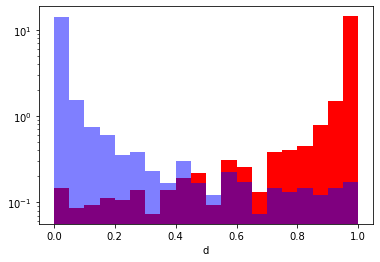

In [6]:
#@title Soluzione Parte 3 (clicca su show code per vedere il codice)
import numpy as np
import matplotlib.pyplot as plt 

def d(X,PS,ES,PB,EB):

  S = 1.0
  B = 1.0
  for i in range(3):
    S *= pdf_fun(X[i],PS[i],ES[i])
    B *= pdf_fun(X[i],PB[i],EB[i])
  if (S+B)>0:
    return S/(S+B)
  else:
    return 0.5

print('d(muS) = ', d(muS, pdfS,edgesS,pdfB,edgesB))
print('d(muB) = ', d(muB, pdfS,edgesS,pdfB,edgesB))

dS = [d(x,pdfS,edgesS,pdfB,edgesB) for x in yS]
dB = [d(x,pdfS,edgesS,pdfB,edgesB) for x in yB]

plt.hist(dS, bins=20, color='red', range=(0,1), density=True)
plt.xlabel('d')
plt.hist(dB, bins=20, color='blue', alpha=0.5, range=(0,1), density=True)
plt.xlabel('d')
plt.yscale('log')

def disc(X, PS,ES,PB,EB):
  if d(X,PS,ES,PB,EB)>=0.5:
    return  1 #classe S
  else:
    return -1 #classe B

# Confusion matrix training set

resS_train = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yS[:2000]]
resB_train = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yB[:2000]]

TP = np.sum((np.array(resS_train)>=0) == True)
FN = np.sum((np.array(resS_train)<0) == True)
TN = np.sum((np.array(resB_train)<0) == True)
FP = np.sum((np.array(resB_train)>=0) == True)

conf_mat_train = np.array([[TP, FN],[FP, TN]])
print('Confusion matrix training:')
print(conf_mat_train)
print()

acc_train = (TP+TN)/(TP+TN+FN+FP)
precision_train = TP/(TP+FP)
recall_train = TP/(TP+FN)
print('accuracy train: ', acc_train)
print('precision train: ', precision_train)
print('recall train: ', recall_train) 
print()

resS_test = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yS[2000:]]
resB_test = [disc(x,pdfS,edgesS,pdfB,edgesB) for x in yB[2000:]]

TP = np.sum((np.array(resS_test)>=0) == True)
FN = np.sum((np.array(resS_test)<0) == True)
TN = np.sum((np.array(resB_test)<0) == True)
FP = np.sum((np.array(resB_test)>=0) == True)

conf_mat_test = np.array([[TP, FN],[FP, TN]])
print('Confusion matrix test:')
print(conf_mat_test)
print()

acc_test = (TP+TN)/(TP+TN+FN+FP)
precision_test = TP/(TP+FP)
recall_test = TP/(TP+FN)
print('accuracy test: ', acc_test)
print('precision test: ', precision_test)
print('recall test: ', recall_test) 


**Suggeriti per casa:**
1.   provare a giocare con le medie e le varianze delle osservabili, cambiandone i valori. A che punto il classificatore perde il suo potere di classificare gli eventi delle due classi?
2.   provare a ripetere il problema assumendo una matrice di covarianza correlata tra le osservabili (senza cambiare gli elementi della diagonale principale). Le prestazioni dell'algoritmo di classificazione migliorano o peggiorano?
3.   Implementare in modo semplice in python un algoritmo che risolva il problema del commesso viaggiatore utilizzando per trovare la soluzione un algoritmo di ottimizzazione genetico:
> data una griglia bidimensionale di passo fissato, posizionate 20 punti in 20 nodi della griglia scelti in modo random (città);
> il problema è quello di visitare tutte e 20 le città senza mai passare per due volte nella stessa città e minimizzando il cammino fatto.                
> **Suggerimento**: codificate il problema con un vettore soluzione di dimensione 20 che contiene l'indice di ciascuna città nell'ordine in cui le visitate e con il vincolo che non ci possono essere due elementi del vettore con eguale valore.                                                             
> Partite da una soluzione random e eseguite mutazioni che conservano il vincolo (SWAP (esempio: (1,2,3) --> (1,3,2)) e CROSS-OVER ORDINATO (esempio: (1,2,**3**,4,**5**) e (3,5,1,4,2) --> (1,4,3,2,5))                              
> evolvete solo le mutazioni positive (che minimizzano la distanza percorsa) mentre lasciate estinguere le soluzioni negative...                            
> graficate ogni N epoche la soluzione ottenuta ...